# Heart Disease Prediction (Heart Disease UCI Dataset)

**Integrantes**   
+ Juan Esteban Serna Vega       
+ Erick Lambis Alandete
+ Juan Esteban Gil Loaiza

1. Preparación de los datos
2. EDA
3. Modelos
4. Conclusiones

### Intro

En el siguiente notebook se analiza un dataset y se implementa un modelo de clasificación usando Machine Learning. Se utiliza como base el [Heart Disease UCI Dataset](https://archive.ics.uci.edu/ml/index.php), que contiene los datos de 303 pacientes (y 76 atributos) como grupo de prueba.

El conjunto de datos es de tipo multivariante, lo que significa que proporciona o implica una variedad de variables matemáticas o estadísticas separadas, análisis de datos numéricos multivariantes. Se compone de 14 atributos que son la edad, el sexo, el tipo de dolor de pecho, presión arterial en reposo, el colesterol sérico, la glucemia en ayunas, los resultados electrocardiográficos en reposo, la frecuencia cardíaca máxima alcanzada, la angina de pecho inducida por el ejercicio, el oldpeak -depresión del ST inducida por el ejercicio en relación con el reposo-, la pendiente del segmento ST máximo del ejercicio, el número de vasos mayores y la talasemia.

Esta base de datos incluye 76 atributos, pero todos los estudios publicados se refieren al uso de un subconjunto de 14 de ellos. Una de las principales tareas de este conjunto de datos es predecir, basándose en los atributos dados de un paciente, si esa persona en particular tiene una enfermedad cardíaca o no, y otra es la tarea experimental para diagnosticar y encontrar varias ideas de este conjunto de datos que podrían ayudar a comprender mejor el problema. Como se menciona arriba, y dado que es una base abierta al público, se han efectuado diversos estudios sobre la misma y mayoritariamente se han decantado por el uso de un subconjunto con 14 de atributos.

La recolección de todos los datos dentro del repositorio para los ensayos clínicos se hizo en los siguientes centros:

    1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.  
    2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.  
    3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.  
    4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.  

El objetivo de la clasificación es la detección de la presencia de enfermedad del corazón en un paciente. Se asigna un valor entero desde 0 (sin presencia) hasta 4. Los estudios se han concentrado en intentar distinguir la presencia (valores 1, 2, 3, 4) de la ausencia (valor 0). Por motivos de manejo de datos, toda información personal se ha reemplazado con valores dummy.

| Características del Conjunto de Datos: Multivariante | Instancias: 303 | Área: Vida |
| --- | --- | --- |
| Características de los Atributos: Categórico, Entero, Real | Número de Atributos: 75 | Donado en: 1998-07-07 |
| Tareas Asociadas: Clasificación | Faltantes: Si | Referencias en sitios web: |

Información más detallada acerca de la base de datos y sus 76 atributos puede encontrarse [aquí](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).


## **1. Preparación inicial de los datos**

In [1]:
#Se importan las librerías y módulos.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#plt.style.use('fivethirtyeight')
#['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn',
#'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted',
# 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white',
#'seaborn-whitegrid', 'tableau-colorblind10']
plt.style.use('tableau-colorblind10')    

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

#from plotly.offline import iplot
#import plotly as py
#import plotly.tools as tls

In [2]:
# Se crea un dataframe mediante la lectura de un archivo .csv con Pandas
data = pd.read_csv('heart.csv')

print('En el output se pueden ver los ' + str(data.shape[1]) + ' atributos seleccionados de los 76 totales que contiene el dataset original.')
print('\n','Adicional se verifica que el dataset tiene ' + str(data.shape[0]) + ' instancias.','\n')

# Se muestran los primeros cinco registros por defecto
data.head()

En el output se pueden ver los 14 atributos seleccionados de los 76 totales que contiene el dataset original.

 Adicional se verifica que el dataset tiene 303 instancias. 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Diccionario de datos: a continuación se muestra una explicación detallada para cada atributo del dataset.


| **#** | Atributo | Descripción | Medida |
| --- | --- | --- | --- |
| **1** | age | Edad de la persona | En años |
| **2** | sex | Sexo de la persona | (1 = Masculino, 0 = Femenino) |
| **3** | cp | Nivel de dolor de pecho | 1: Angina Típica, 2:Angina Atípica, 3:Dolor No Anginal, 4: Asintomático |
| **4** | trestbps | Presión Sanguínea en Reposo de la Persona | (mm Hg al momento de ingreso al hospital) |
| **5** | chol | Colesterol de la persona | mg/dl |
| **6** | fbs | Glicemia en Ayunas de la Persona >120 mg/dl | 1 = Verdadero, 0 = Falso |
| **7** | restecg | Medida electrocardiográfica en reposo | (0 = Normal, 1 = Onda ST-T anormal, 2 = Probable Hipertrofia Ventricular |
| **8** | thalach | Pulso Cardíaco Máximo de la Persona | - |
| **9** | exang | Angina Inducida por ejercicio | (1 = Si, 0 = No) |
| **10** | oldpeak | Depresión ST Inducida por el Ejercicio en Relación al Reposo | - |
| **11** | slope | Pendiente del Ejercicio Máxima en el Segmento ST | (1:Incremento, 2: Plana, 3:Disminución) |
| **12** | ca | Número de vasos sanguíneos principales | (0-3) |
| **13** | thal | Desorden sanguíneo llamado talasemia | (3 = normal, 6 = defecto fijo, 7 = efecto reversible) |
| **14** | target | Enfermedad del corazón (**Valor a Predecir**) | (0 = no, 1 = si) |


## **2. Análisis exploratorio de datos**

In [3]:
# Resumen de medidas de tendencias central, y medidas de dispersión del conjunto de datos.
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303,303,303,303,303,303
mean,54.3663,0.683168,0.966997,131.624,246.264,0.148515,0.528053,149.647,0.326733,1.0396,1.39934,0.729373,2.31353,0.544554
std,9.0821,0.466011,1.03205,17.5381,51.8308,0.356198,0.52586,22.9052,0.469794,1.16108,0.616226,1.02261,0.612277,0.498835
min,29,0,0,94,126,0,0,71,0,0,0,0,0,0
25%,47.5,0,0,120,211,0,0,133.5,0,0,1,0,2,0
50%,55,1,1,130,240,0,1,153,0,0.8,1,0,2,1
75%,61,1,2,140,274.5,0,1,166,1,1.6,2,1,3,1
max,77,1,3,200,564,1,2,202,1,6.2,2,4,3,1


Se desataca de la tabla anterior:<br />
**Edad:** la media de edad del grupo de pacientes (54 años, con pacioentes entre 29 y 77 años).<br />
**Presión sanguínea** del grupo: 132 (con valores que oscilan entre 94 y 200).<br />
**Colesterol:** valor medio en 246 (con valores entre 126 y 564).<br />

In [4]:
# Se verifica si el dataset tiene valores faltantes
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

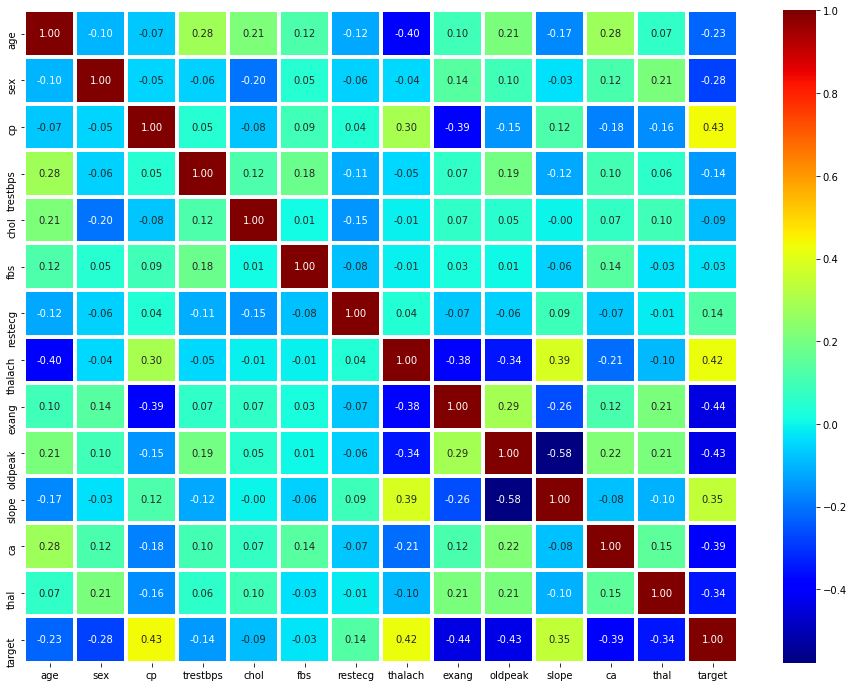

In [5]:
# Análisis de correlación (para los 14 atributos)
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,cmap='jet',fmt='.2f',linewidths=3)
plt.show()

Mediante el mapa de calor es posible verificar las correlaciones de los atributos en cuestión.
Se puede evidenciar correlación positiva entre el "Target" y los atributos "cp", "thalach", y "slope", mientras que existe una correlación negativa entre el "Target" y "sex", "exang", "oldpeak", "ca", "thal".

El Pairplot permite identificar relaciones y distribución para cada variable en el conjunto de datos

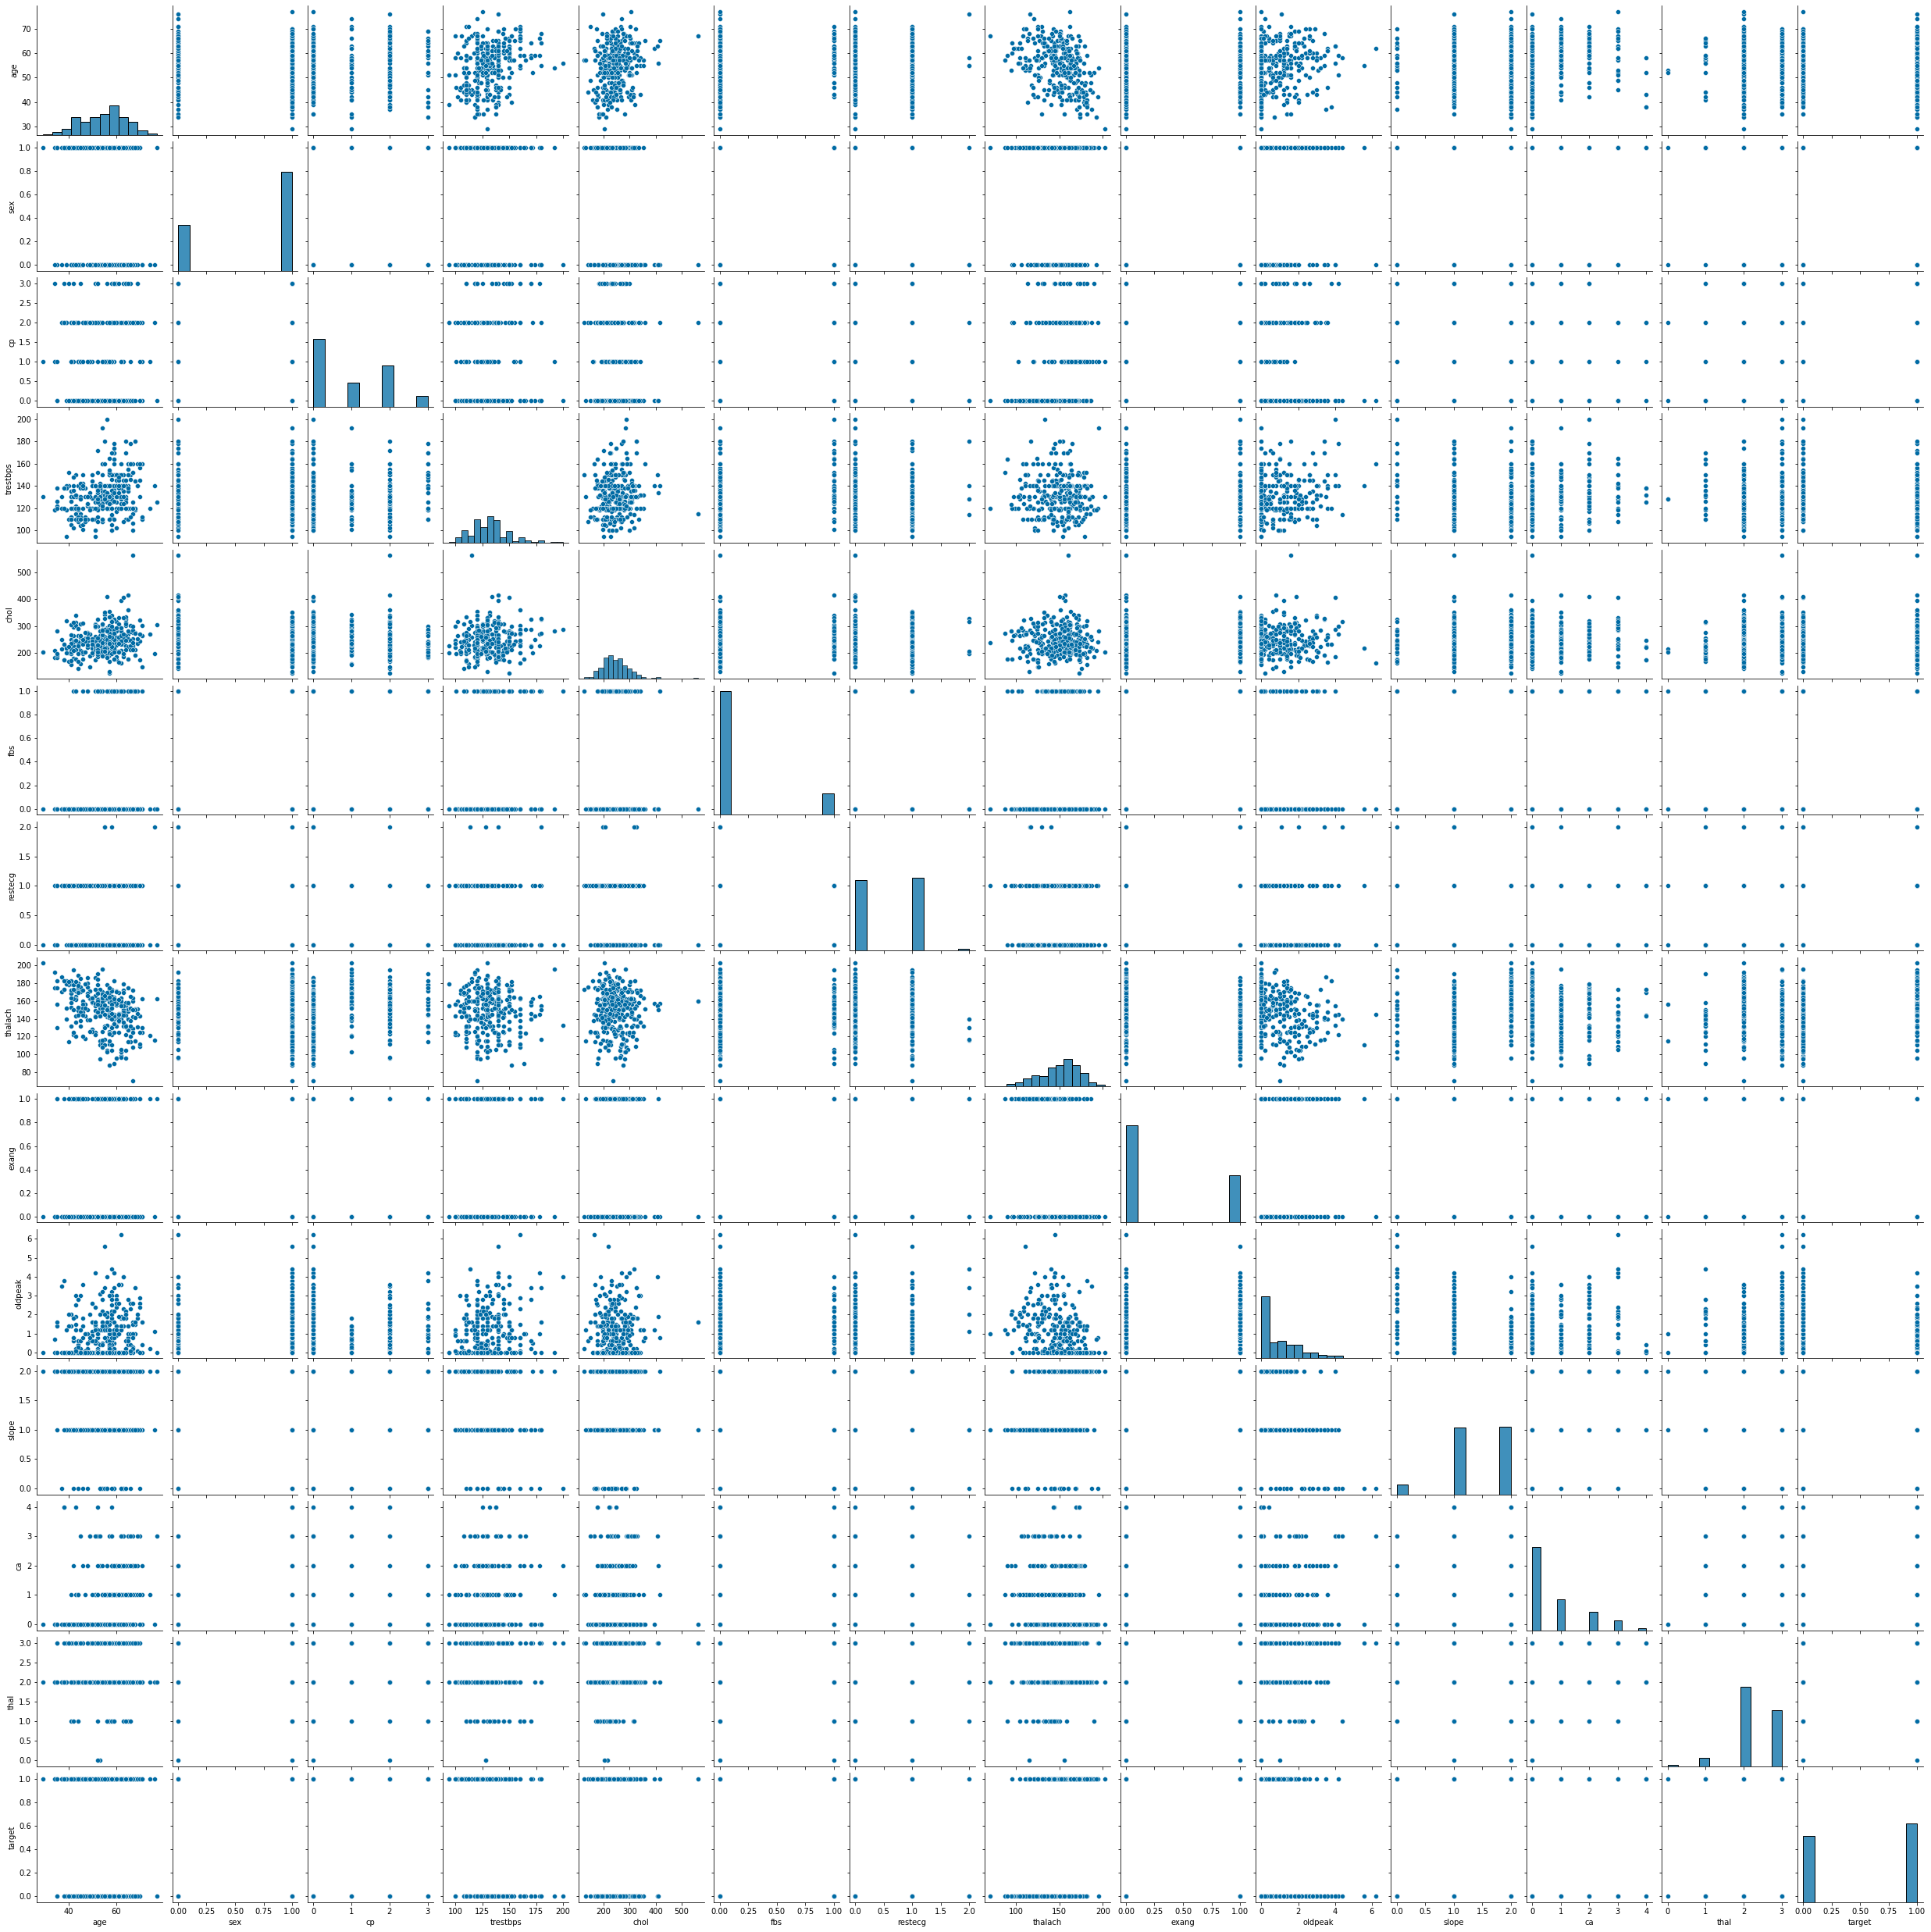

In [6]:
sns.pairplot(data)

A continuación se presentan únicamente las distribuciones de variables del dataset (diagonal principal del pairplot).

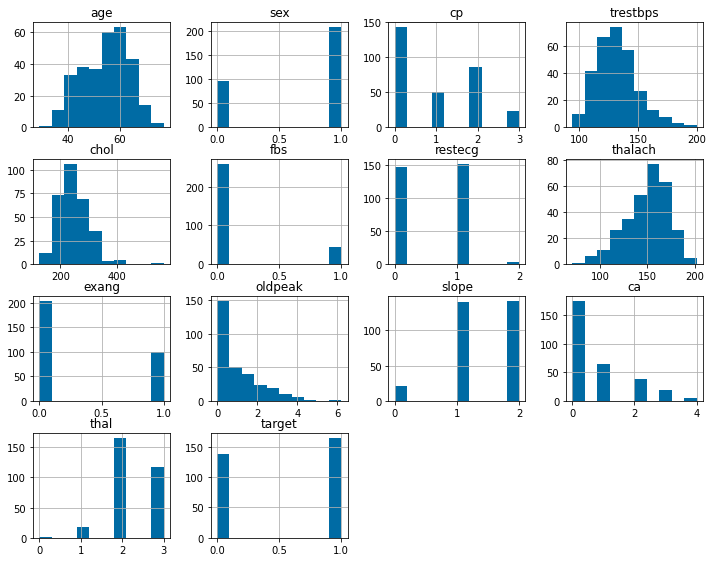

In [7]:
data.hist(figsize=(12,12), layout=(5,4));

In [8]:
# Separación en variables numéricas y categóricas
data_num = data[['age','trestbps','chol','thalach','oldpeak']]
data_cat = data[['sex','cp','fbs','restecg','exang']]

# Análisis por sexo. Rcordar: 0: Femenino, 1: Masculino.
pd.pivot_table(data, index=data.sex, values=['age','trestbps','chol','thalach','oldpeak']).apply(lambda s: s.apply(lambda x: format(x, 'g')))

,age,chol,oldpeak,thalach,trestbps
sex,,,,,
0,55.6771,261.302,0.876042,151.125,133.083
1,53.7585,239.29,1.11546,148.961,130.947


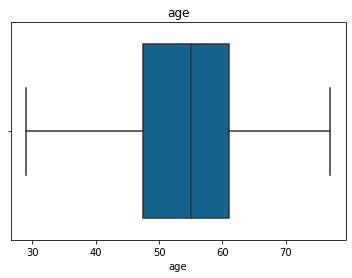

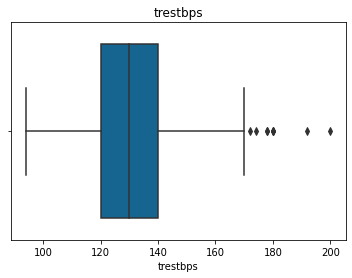

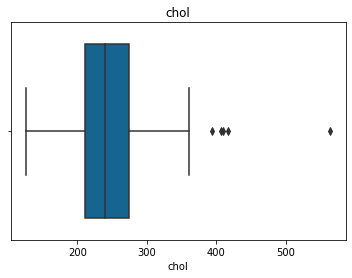

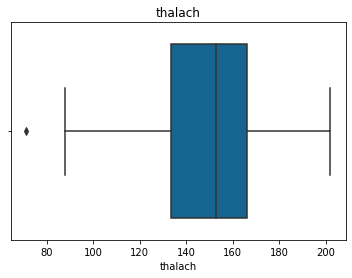

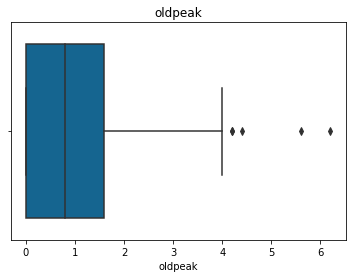

In [9]:
# Análisis gráfico (Boxplot) de las variables numéricas (Edad, Presión sanguínea, Colesterol, Pulso cardíaco máximo) 
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

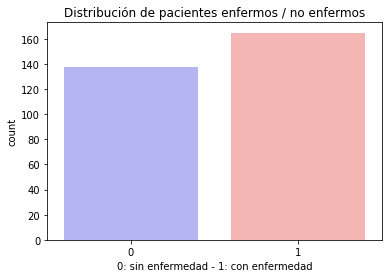

Pacientes No enfermos: 138
Pacientes Enfermos: 165 

Pacientes No enfermos: 45.54%
Pacientes Enfermos: 54.46%


In [10]:
# Cantidad de pacientes enfermos
sns.countplot(x='target',data=data,palette="bwr")
plt.xlabel('0: sin enfermedad - 1: con enfermedad')
plt.title('Distribución de pacientes enfermos / no enfermos')
plt.show()

countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print('Pacientes No enfermos: '+ str(len(data[data.target == 0])))
print('Pacientes Enfermos: '+ str(len(data[data.target == 1])),'\n')
print("Pacientes No enfermos: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Pacientes Enfermos: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

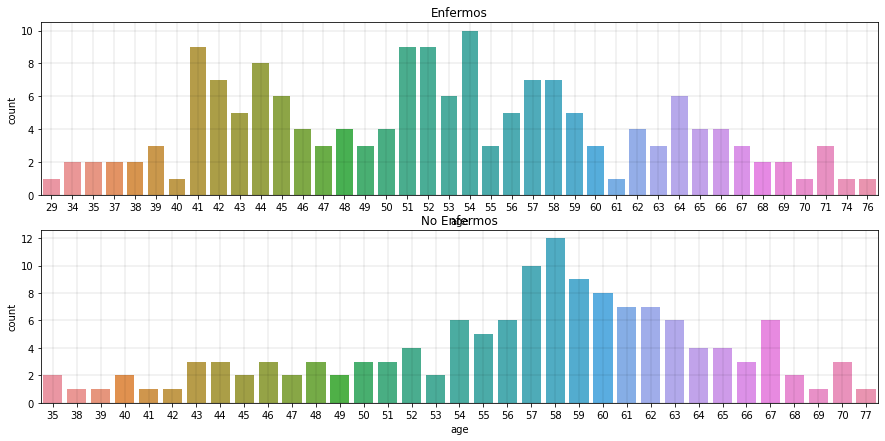

In [11]:
# Revisión de la edad de los pacientes

fig = plt.figure(figsize=(15,7))
ax3 = fig.add_subplot(2,1,1)
ax3.set_title('Enfermos')
ax3.tick_params(labelbottom='off',axis='x')
sns.countplot(data[data.target==1].age)
plt.grid(color='black', linestyle='-', linewidth=0.1)
ax3.set_facecolor('white')

ax4 = fig.add_subplot(2,1,2)
ax4.set_title('No Enfermos')
sns.countplot(data[data.target==0].age)
plt.grid(color='black', linestyle='-', linewidth=0.1)
ax4.set_facecolor('white')

El gráfico anterior muestra un fuerte número de población enferma a partir de los 41 años. Dentro de la población no enferma es notable la participación alta de personas mayores a 50 años. Esto puede ser reflejo de la población analizada para esta condición médica (heart disease). Finalmente, no se observa una edad límite para los problemas del corazón.

Exploración por género

Mujeres = 96 
 Hombres = 207


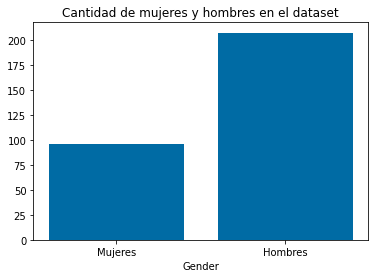

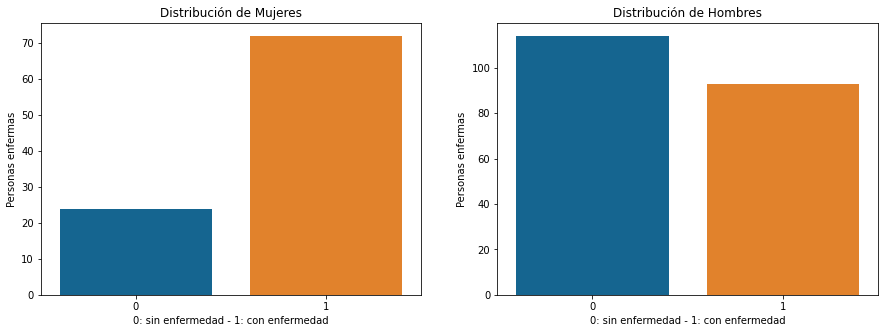

Porcentaje de mujeres con enfermedad: 0.75
Porcentaje de hombres con enfermedad: 0.45


In [12]:
# Cantidad de hombres y mujeres
F = data[data['sex'] == 0].count()['target']
M = data[data['sex'] == 1].count()['target']
print('Mujeres = ' + str(F),'\n','Hombres = ' + str(M))
x_labels = [F, M]

# Gráfico
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Mujeres', 'Hombres'], height = [F, M])
plt.xlabel('Gender')
plt.title('Cantidad de mujeres y hombres en el dataset')
plt.show()

fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(15, 5))
y = data[data["sex"] == 0]['target']
ax = sns.countplot(y,ax = axis1)
ax.set_title('Distribución de Mujeres')
ax.set_xlabel('0: sin enfermedad - 1: con enfermedad')
ax.set_ylabel('Personas enfermas')
x = data[data["sex"] == 1]['target']
ax = sns.countplot(x,ax = axis2)
ax.set_title('Distribución de Hombres')
ax.set_xlabel('0: sin enfermedad - 1: con enfermedad')
ax.set_ylabel('Personas enfermas')
plt.show()

countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
dataM = data[data.sex == 0]
dataH = data[data.sex == 1]
print("Porcentaje de mujeres con enfermedad: {:.2f}".format((len(dataM[dataM.target == 1]))/((countFemale))))
print("Porcentaje de hombres con enfermedad: {:.2f}".format((len(dataH[dataH.target == 1]))/((countMale))))

En la exploración anterior es notorio el peso mayor de personas enfermas en la muestra de mujeres que en la muestra de hombres.

Exploración de dolencias de pecho (cp)

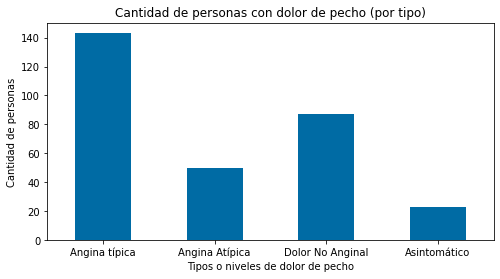

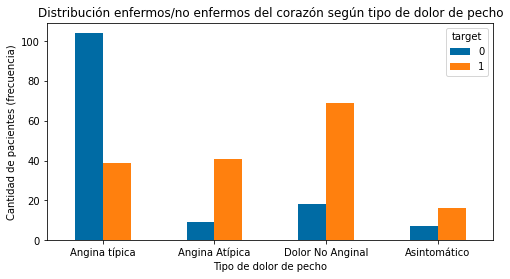

In [13]:
data.groupby(data['cp']).count()['target'].plot(kind = 'bar', title = 'Cantidad de personas con dolor de pecho (por tipo)', figsize = (8, 4))
plt.xlabel('Tipos o niveles de dolor de pecho')
plt.xticks(np.arange(4), ('Angina típica', 'Angina Atípica', 'Dolor No Anginal', 'Asintomático'), rotation = 0)
plt.ylabel('Cantidad de personas')
plt.show()

pd.crosstab(data.cp,data.target).plot(kind = "bar", figsize = (8, 4))
plt.title('Distribución enfermos/no enfermos del corazón según tipo de dolor de pecho')
plt.xlabel('Tipo de dolor de pecho')
plt.xticks(np.arange(4), ('Angina típica', 'Angina Atípica', 'Dolor No Anginal', 'Asintomático'), rotation = 0)
plt.ylabel('Cantidad de pacientes (frecuencia)')
plt.show()

Exploración de la presión sanguínea (trestbps)

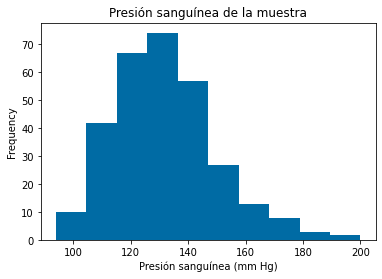

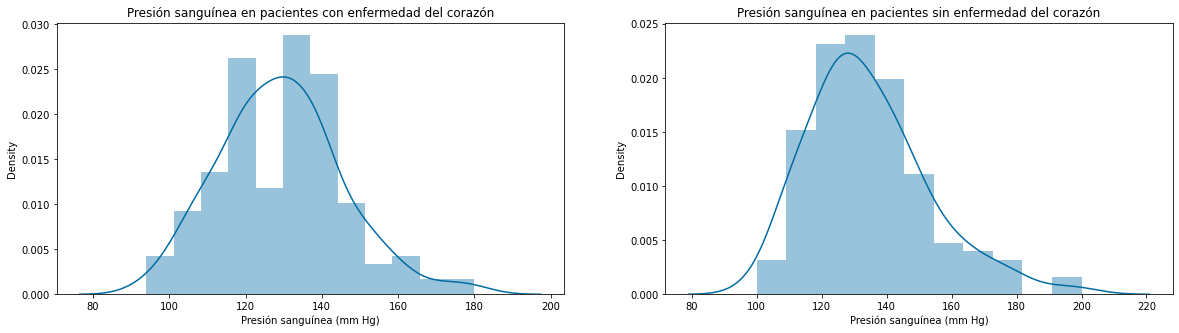

In [14]:
data['trestbps'].plot(kind = 'hist', title = 'Presión sanguínea de la muestra', figsize = (6, 4))
plt.xlabel('Presión sanguínea (mm Hg)')
plt.show()

# Presión sanguínea en pacientes aliviados y no aliviados
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(20, 5))
ax = sns.distplot(data[data['target'] == 1]['trestbps'], ax = axis1)
ax.set_title('Presión sanguínea en pacientes con enfermedad del corazón')
ax.set(xlabel='Presión sanguínea (mm Hg)')
ax = sns.distplot(data[data['target'] == 0]['trestbps'], ax = axis2)
ax.set_title('Presión sanguínea en pacientes sin enfermedad del corazón')
ax.set(xlabel='Presión sanguínea (mm Hg)');

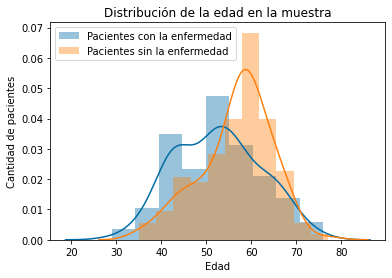

In [15]:
# Distribución de la edad en los pacientes
sns.distplot(data[data['target'] == 1]['age'], label='Pacientes con la enfermedad')
sns.distplot(data[data['target'] == 0]['age'], label = 'Pacientes sin la enfermedad')
plt.ylabel('Cantidad de pacientes')
plt.xlabel('Edad')
plt.title('Distribución de la edad en la muestra')
plt.legend()
plt.show()

Exploración del colesterol (chol)

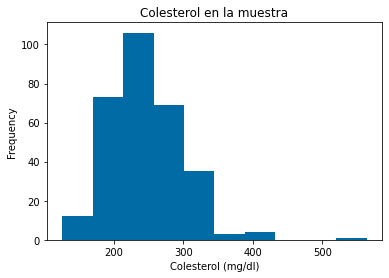

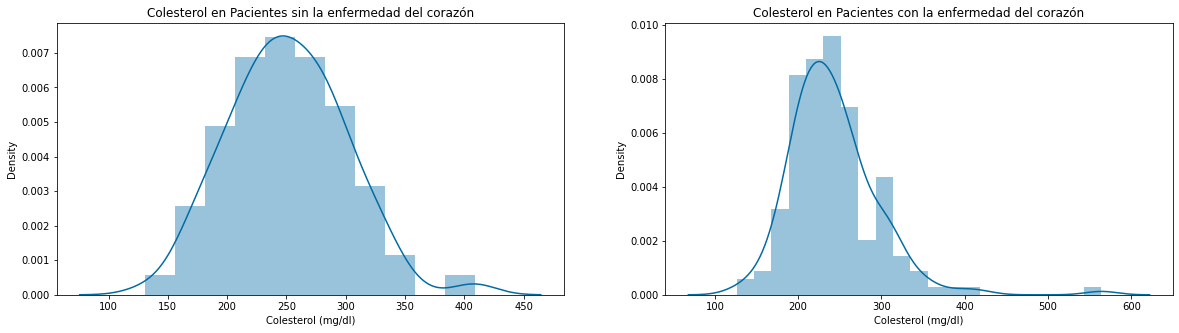

Colesterol mín. de pacientes SIN la enfermedad del corazón:  131
Colesterol máx. de pacientes SIN la enfermedad del corazón:  409
Colesterol prom. de pacientes SIN la enfermedad del corazó:  251.08695652173913 

Colesterol mín. de pacientes CON la enfermedad del corazón:  126
Colesterol máx. de pacientes CON la enfermedad del corazón:  564
Colesterol prom. de pacientes CON la enfermedad del corazó:  242.23030303030302 



In [16]:
data['chol'].plot(kind = 'hist', title = 'Colesterol en la muestra', figsize = (6, 4))
plt.xlabel('Colesterol (mg/dl)')
plt.show()

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 5))
ax = sns.distplot(data[data['target'] == 0]['chol'], label='Pacientes sin la enfermedad del corazón', ax = axis1)
ax.set(xlabel='Colesterol (mg/dl)')
ax.set_title('Colesterol en Pacientes sin la enfermedad del corazón')
ax = sns.distplot(data[data['target'] == 1]['chol'], label = 'Pacientes con la enfermedad del corazón', ax = axis2)
ax.set_title('Colesterol en Pacientes con la enfermedad del corazón')
ax.set(xlabel='Colesterol (mg/dl)')
plt.show()

print('Colesterol mín. de pacientes SIN la enfermedad del corazón: ', min(data[data['target'] == 0]['chol']))
print('Colesterol máx. de pacientes SIN la enfermedad del corazón: ', max(data[data['target'] == 0]['chol']))
print('Colesterol prom. de pacientes SIN la enfermedad del corazó: ', data[data['target'] == 0]['chol'].mean(),'\n')
print('Colesterol mín. de pacientes CON la enfermedad del corazón: ', min(data[data['target'] == 1]['chol']))
print('Colesterol máx. de pacientes CON la enfermedad del corazón: ', max(data[data['target'] == 1]['chol']))
print('Colesterol prom. de pacientes CON la enfermedad del corazó: ', data[data['target'] == 1]['chol'].mean(),'\n')

Exploración del nivel de azúcar en la sangre (fbs)

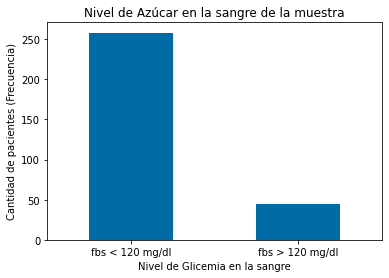

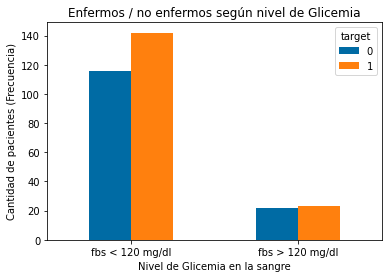

In [17]:
data.groupby(data['fbs']).count()['target'].plot(kind = 'bar', title = 'Nivel de Azúcar en la sangre de la muestra', figsize = (6, 4))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Cantidad de pacientes (Frecuencia)')
plt.xlabel('Nivel de Glicemia en la sangre')
plt.show()

# Display fasting blood sugar based on the target
pd.crosstab(data.fbs,data.target).plot(kind = "bar", figsize = (6, 4))
plt.title('Enfermos / no enfermos según nivel de Glicemia')
plt.xlabel('Nivel de Glicemia en la sangre')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Cantidad de pacientes (Frecuencia)')
plt.show()

Exploración del Pulso cardíaco máximo (thalach)

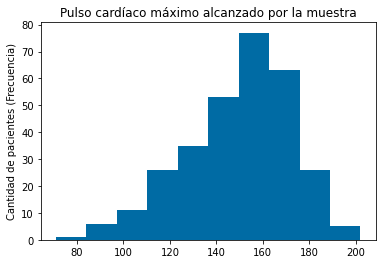

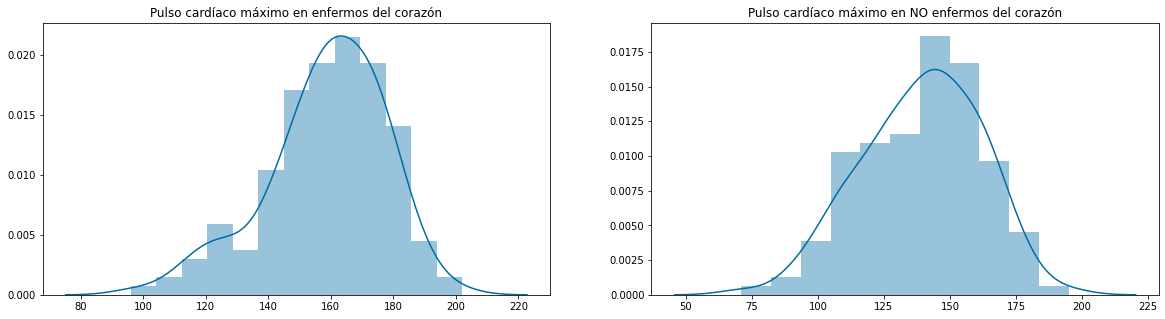

Pulso cardíaco mín. en personas SIN enfermedad del corazón:  71
Pulso cardíaco máx. en personas SIN enfermedad del corazón:  195
Pulso cardíaco prom. en personas SIN enfermedad del corazón:  139.1014492753623 

Pulso cardíaco mín. en personas CON enfermedad del corazón:  96
Pulso cardíaco máx. en personas CON enfermedad del corazón:  202
Pulso cardíaco prom. en personas CON enfermedad del corazón:  158.46666666666667 



In [18]:
data['thalach'].plot(kind = 'hist', title = 'Pulso cardíaco máximo alcanzado por la muestra', figsize = (6, 4))
plt.ylabel('Cantidad de pacientes (Frecuencia)')
plt.show()

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 5))
ax = sns.distplot(data[data['target'] == 1]['thalach'], ax = axis1)
ax.set(xlabel = '', title='Pulso cardíaco máximo en enfermos del corazón',ylabel ='')
ax = sns.distplot(data[data['target'] == 0]['thalach'], ax = axis2)
ax.set(xlabel = '', title='Pulso cardíaco máximo en NO enfermos del corazón',ylabel ='')
plt.show()

print('Pulso cardíaco mín. en personas SIN enfermedad del corazón: ', min(data[data['target'] == 0]['thalach']))
print('Pulso cardíaco máx. en personas SIN enfermedad del corazón: ', max(data[data['target'] == 0]['thalach']))
print('Pulso cardíaco prom. en personas SIN enfermedad del corazón: ', data[data['target'] == 0]['thalach'].mean(),'\n')
print('Pulso cardíaco mín. en personas CON enfermedad del corazón: ', min(data[data['target'] == 1]['thalach']))
print('Pulso cardíaco máx. en personas CON enfermedad del corazón: ', max(data[data['target'] == 1]['thalach']))
print('Pulso cardíaco prom. en personas CON enfermedad del corazón: ', data[data['target'] == 1]['thalach'].mean(),'\n')

Correlación entre la Enfermedad del corazón y los tipos (niveles) de dolor de pecho (cp). Separación entre Angina inducida por el ejercicio (exang=1) / Angina no inducida por el ejercicio (exang=0).

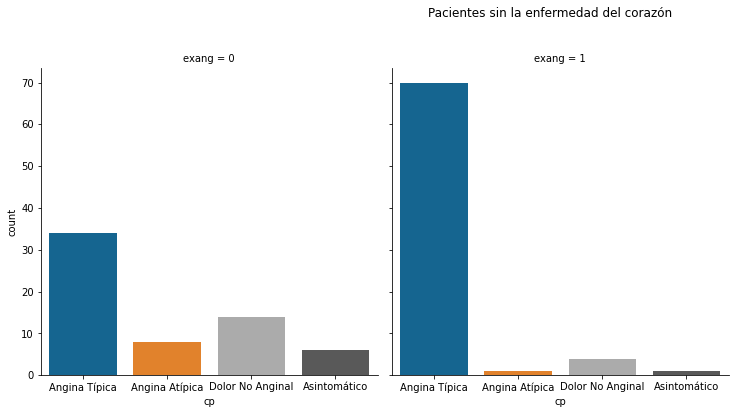

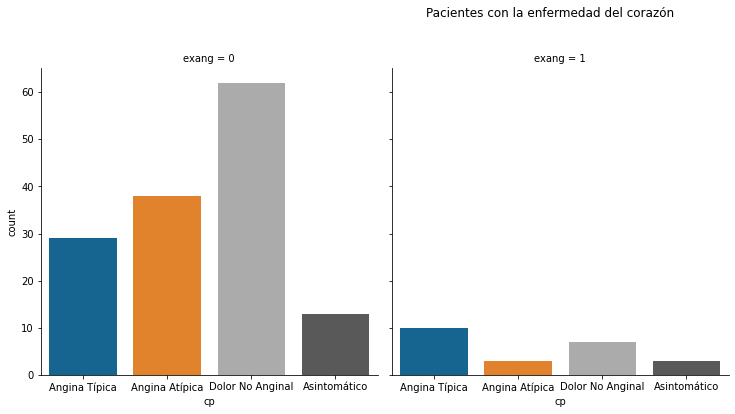

In [19]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = data[data['target'] == 0], kind = "count")
plt.xticks(np.arange(4), ('Angina Típica', 'Angina Atípica', 'Dolor No Anginal', 'Asintomático'), rotation = 0)
g.fig.suptitle('Pacientes sin la enfermedad del corazón', y = 1.1)
plt.show()

g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = data[data['target'] == 1], kind = "count")
plt.xticks(np.arange(4), ('Angina Típica', 'Angina Atípica', 'Dolor No Anginal', 'Asintomático'), rotation = 0)
g.fig.suptitle('Pacientes con la enfermedad del corazón', y = 1.1)
plt.show()

## **3. Modelos**

Cada metodología de clasificación y aprendizaje de máquina arroja distintos resultados estadísticos y numéricos los cuales podrán dar indicios de sobre la efectividad del modelo usado y la veracidad de los resultados.

Estadísticamente se usará la precisión arrojada de cada metodología, entendiendo la precisión como la dispersión de un grupo de valores obtenidos, o reproducibilidad de los resultados. Entre más cercano sea este valor a 1, mayor será la precisión.

La métrica _*Precision*_ intenta responder a ¿Qué proporción de identificaciones positivas fueron correctas? y se define así:
<img src="https://www.oreilly.com/library/view/machine-learning-for/9781786469878/assets/0d62b03f-a5d1-45df-b489-d23ae8662b53.png" width="300" height="300" />

*tp* representa el número de verdaderos positivos y *fp* el número de falsos negativos. La Precisión es la capacidad del clasificador para no etiquetar como positiva a una muestra que es negativa. El mejor valor es 1 y el peor valor es 0.

***************************************

_*Recall*_ intenta responder a ¿Qué proporción de positivos reales se identificaron correctamente? y se define así:
<img src="https://www.oreilly.com/library/view/machine-learning-for/9781786469878/assets/f662d6a2-223f-4aec-808e-f689c38ba269.png" width="300" height="300" />

Puede ser descrito como la capacidad del clasificador para encontrar todos las muestras positivas, donde sus rangos son entre 1 (óptimo) y 0.

***************************************

_*F1 Score*_ se calcula de la precision y el recall de la prueba. El _*F1 Score*_ es básicamente la Media Harmónica de ambos. Se define así:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/495px-Precisionrecall.svg.png" width="300" height="300" />
El mayor valor posible de esta métrica es 1, lo cual indica un precision y recall perfecto, mientras que 0 indica que que uno de esos valores es 0.

In [20]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Se procede a crear variables dummy para los atributos cp, slope, thal y restecg.

In [21]:
chest_pain=pd.get_dummies(data['cp'],prefix='cp',drop_first=True)
data=pd.concat([data,chest_pain],axis=1)
data.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(data['slope'],prefix='slope')
th=pd.get_dummies(data['thal'],prefix='thal')
#trestb=pd.get_dummies(data['trestbps'],prefix='trestbps') en reunion habíamos considerado esta, pero no aplica aquí
rest_ecg=pd.get_dummies(data['restecg'],prefix='restecg')
frames=[data,sp,th,rest_ecg]
data=pd.concat(frames,axis=1)
data.drop(['slope','thal','restecg'],axis=1,inplace=True)

A continuación se presenta el nuevo dataframe con las columnas adicionales correspondientes a las variables dummy. Para cada una de las variables categóricas se creó una nueva columna en la que 1 es la presencia y 0 la inexistencia de la condición.

In [22]:
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0


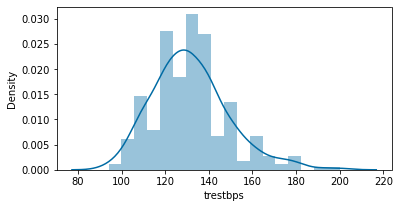

In [23]:
# Visualización de los datos originales

plt.figure(figsize=(6,3))
sns.distplot(data['trestbps'])
plt.show()

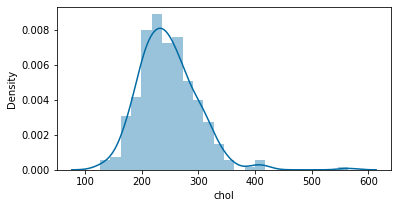

In [24]:
plt.figure(figsize=(6,3))
sns.distplot(data['chol'])
plt.show()

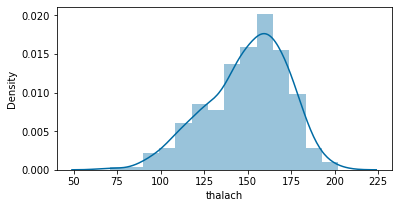

In [25]:
plt.figure(figsize=(6,3))
sns.distplot(data['thalach'])
plt.show()

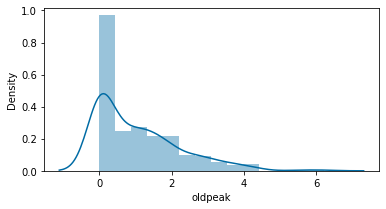

In [26]:
plt.figure(figsize=(6,3))
sns.distplot(data['oldpeak'])
plt.show()

In [27]:
# Este bloque se aplica el StandardScaler al conjunto de datos
# específicamente a las variables numéricas (trestbps, chol, thalach, oldpeak).
# La estandarización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático:
# podrían comportarse mal si las características individuales no se parecen más o menos a datos estándar distribuidos normalmente
# (por ejemplo, gaussianos con media 0 y varianza unitaria).

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['trestbps','chol','thalach','oldpeak']
data[columns_to_scale] = StandardScaler.fit_transform(data[columns_to_scale])  

In [28]:
#datos después de escalar
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,0.763956,-0.256334,1,0.015443,0,1.087338,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0
1,37,1,-0.092738,0.072199,0,1.633471,0,2.122573,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
2,41,0,-0.092738,-0.816773,0,0.977514,0,0.310912,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0
3,56,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0
4,57,0,-0.663867,2.082050,0,0.583939,1,-0.379244,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0


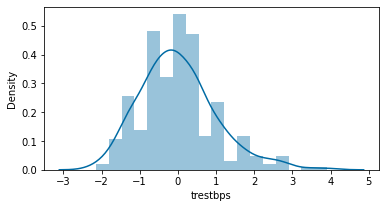

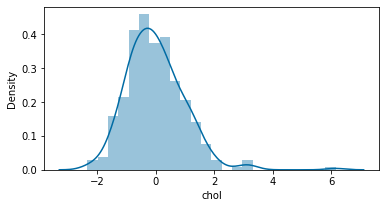

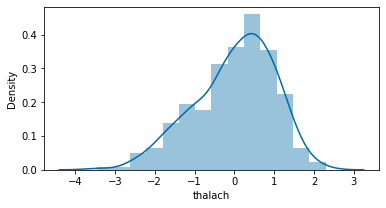

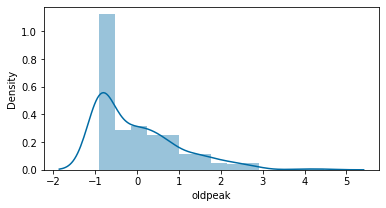

In [29]:
# Visualización de los datos
for i in columns_to_scale:
    plt.figure(figsize=(6,3))
    sns.distplot(data[i])
    #sns.distplot(X_test[:,i])
    plt.show()

In [30]:
# Nuevamente se usa la función de pandas .describe() para analizar la descripción estadística del conjunto de datos

data.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
count,303.000000,303.000000,3.030000e+02,3.030000e+02,303.000000,3.030000e+02,303.000000,3.030000e+02,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,-7.146832e-16,-9.828955e-17,0.148515,-5.203025e-16,0.326733,-3.140136e-16,0.729373,0.544554,0.165017,0.287129,0.075908,0.069307,0.462046,0.468647,0.006601,0.059406,0.547855,0.386139,0.485149,0.501650,0.013201
std,9.082101,0.466011,1.001654e+00,1.001654e+00,0.356198,1.001654e+00,0.469794,1.001654e+00,1.022606,0.498835,0.371809,0.453171,0.265288,0.254395,0.499382,0.499842,0.081110,0.236774,0.498528,0.487668,0.500606,0.500824,0.114325
min,29.000000,0.000000,-2.148802e+00,-2.324160e+00,0.000000,-3.439267e+00,0.000000,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,-6.638668e-01,-6.814943e-01,0.000000,-7.061105e-01,0.000000,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,-9.273778e-02,-1.210553e-01,0.000000,1.466343e-01,0.000000,-2.067053e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,4.783913e-01,5.456738e-01,0.000000,7.151309e-01,1.000000,4.834512e-01,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,3.905165e+00,6.140401e+00,1.000000,2.289429e+00,1.000000,4.451851e+00,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Inicializando los datos**


Para iniciar el ajuste de los modelos es necesario separar el dataset en variables predictoras (X o features) y variable a predecir (y o target).

X es el dataframe a excepción de la columna 'target'.
y es la columna 'target', la cual define con valores 0 y 1 la existencia o no de enfermedad de corazón.

In [31]:
target = data['target']
features = data.drop(['target'], axis = 1)

#### **Separación de datos en conjunto de entrenamiento y conjunto de test.**

Después del pre-procesamiento de datos, el siguiente paso es utilizarlos en los modelos que se van a proponer.

Así entonces, se divide el conjunto en **dos grupos, uno de entrenamiento y otro de prueba**.

Esto se debido a que el algoritmo de aprendizaje automático utilizará los datos del conjunto de entrenamiento para aprender lo necesario. 
De esta forma vamos a hacer la división de entrenamiento/prueba en proporciones.  

La parte más grande de la división de datos será el **conjunto de entrenamiento** y la parte más pequeña será el **conjunto de prueba**.  
Esto nos ayudará a asegurarnos de que estamos utilizando suficientes datos para entrenar con precisión nuestro modelo.  

En general, la división de entrenamiento y prueba con una proporción de 80:20, según el principio de Pareto. El principio de Pareto establece que "para muchos eventos, aproximadamente el 80% de los efectos provienen del 20% de las causas".

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 193)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(242, 22) (242,)
(61, 22) (61,)


##**Ajuste de modelos**

Se realizará una aplicación paso por paso del modelo de Árbol de decisión, a modo de demostración. Los demás modelos se aplicarán y evaluarán en conjunto.

In [33]:
# Instanciar el modelo
# El modelo de Árboles de Decisión cuenta con diversos hiperparámetros
# Para el modelo en cuestión, usamos "max_leaf_nodes = 3", el cual establece una condición 
# sobre la división de los nodos en el árbol y, por lo tanto, restringe el crecimiento del árbol. 
# El resto de hiperparámetros se configura por defecto al no darles un input específico.

dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
# Entrenar el modelo
dt_model.fit(X_train,y_train)
# Predecir
dt_predict = dt_model.predict(X_test)
# Evaluar
dt_m = accuracy_score(dt_predict,y_test)
print('Precisión del Modelo Árbol de Decisión: ', dt_m)

Precisión del Modelo Árbol de Decisión:  0.7540983606557377


#### **Matriz de confusión**

permite la visualización del desempeño de un algoritmo de machine learning. Provee con una diagonal donde están los valores acertados después de la clasificación en relación a su misma clase, y aquellos que son clasificados en distintas clases, son los clasificados erróneamente. De aquí se puede obtener la precisión haciendo la división de los datos clasificados correctamente sobre la totalidad de los datos. Entre más cerca sea este valor a 1, más acertado es el algoritmo.

La Matriz de Confusión resume los resultados de predicción en el problema de clasificación.    

**Cuadro superior izquierdo (0,0):** Clasificación de la predicción para un target 0 correctamente (Verdaderos Negativos)   
**Cuadro inferior derecho (1,1):** Clasificación de la predicción para un target 1 correctamente (Verdaderos Positivos)  
En los demás cuadros se muestran los datos de los que hubo predicción errónea.

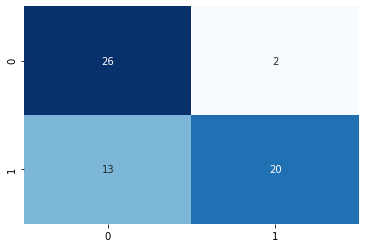

In [34]:
# Matriz de Confusión
cm_dt = confusion_matrix(y_test, dt_predict.round())
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False);

Además del modelo de Árbol de decisión, se hará ajuste y evaluación de otros modelos:

* Support Vector Classifier
* Random Forest Classifier
* AdaBoost Classifier
* Gradient Boosting Classifier
* KNeighbors Classifier
* Naive Bayes
* Regresión Logística

El motivo principal del uso de tantos modelos tan diversos es debido a que el dataset usado en el presente trabajo no es tan robusto y no requiere de gran procesamiento.

En este sentido, permite visualizar rápidamente cambios significativos entre un modelo y otro y, por tanto, se podrá hacer una selección específica de los modelos de mejor rendimiento, y a estos, se les aplicarán metodologías de optimización.

In [35]:
# Inicializar los modelos
dt = DecisionTreeClassifier(max_leaf_nodes=3)
sv = SVC(random_state = 1)
#rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)
knn = KNeighborsClassifier()
nb = GaussianNB()
logre = LogisticRegression(solver='liblinear')

# Función para entrenamiento y evaluación de los modelos
# Definimos como parámetros de la función cada modelo definido arriba,
# los atributos de entrenamiento y prueba, así como el target correspondiente.

def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    #creamos un diccionario para almacenar los resultados
    results = {}
    
    # Entrena el modelo
    model.fit(train_features, y_train)
    
    # Prueba del modelo
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
    # Reporte de Clasificación y Matriz de Confusión
    # Se crean 4 claves:
      # classification report = Almacena resultados de precisión, recall, f1-score, support
      # confusion_matrix = resultados de la matriz de confusión
      # accuracy_score = resultados de precisión
      # test_predicted = cuáles valores predijo correcta e incorrectamente
      
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
    results['accuracy'] = accuracy_score(y_test, test_predicted)
    results['test_predicted'] = test_predicted
    
    return results

# Entrenamiento y evaluación de los modelos
results = {}
for cls in [sv, rf, ab, gb, knn, nb, dt, logre]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

In [36]:
# Ver los resultados
for result in results:
    print(color.BOLD + result + color.END)
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----','\n')

SVC
classification_report :
              precision    recall  f1-score   support

           0       0.59      0.71      0.65        28
           1       0.70      0.58      0.63        33

    accuracy                           0.64        61
   macro avg       0.65      0.65      0.64        61
weighted avg       0.65      0.64      0.64        61


confusion_matrix :
[[20  8]
 [14 19]]

accuracy :
0.639344262295082

test_predicted :
[0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0]

----- 

RandomForestClassifier
classification_report :
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61


confusion_matrix :
[[21  7]
 [ 4 29]]

accuracy :

C-Support Vector Classifier     0.639344
Random Forest Classifier        0.819672
AdaBoostClassifier              0.770492
Gradient Boosting Classifier    0.803279
KNeighbors Classifier           0.803279
Naive Bayes                     0.770492
Decision Tree Classifier        0.754098
Logistic Regression             0.852459
dtype: float64

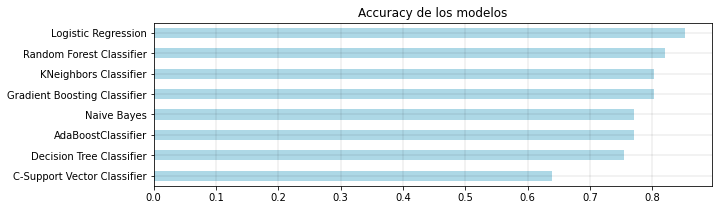

In [37]:
#Creación de un consolidado de resultados de precisión para cada uno de los modelos

precision_modelos = pd.Series(data=[results['SVC']['accuracy'],results['RandomForestClassifier']['accuracy'],
                                   results['AdaBoostClassifier']['accuracy'],results['GradientBoostingClassifier']['accuracy'],
                                   results['KNeighborsClassifier']['accuracy'],results['GaussianNB']['accuracy'],
                                   results['DecisionTreeClassifier']['accuracy'],
                                    results['LogisticRegression']['accuracy']
                                   ], 
        index=['C-Support Vector Classifier','Random Forest Classifier','AdaBoostClassifier','Gradient Boosting Classifier',
               'KNeighbors Classifier','Naive Bayes','Decision Tree Classifier','Logistic Regression'])

fig_mod= plt.figure(figsize=(10,3))
precision_modelos.sort_values().plot.barh(color='lightblue')
plt.title('Accuracy de los modelos')
plt.grid(color='black', linestyle='-', linewidth=0.1)
fig_mod.set_facecolor('white')
precision_modelos

### **Importancia de los Atributos**

En este bloque se pretende obtener la importancia de cada característica de nuestro conjunto de datos utilizando **feature_importances_**.

El valor de la característica le da una puntuación para cada función de sus resultados, cuanto más alta sea la puntuación más significativa o apropiada es la variable de rendimiento.

A continuación definiremos un bucle para imprimir la importancia de cada uno de los atributos para los modelos definidos arriba.

Importancia de los Atributos del Modelo: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False) 

[0.09176137 0.03108303 0.0727821  0.07963146 0.01453677 0.09218693
 0.0616357  0.10009989 0.12399711 0.01638178 0.03115032 0.01580035
 0.00495577 0.0209699  0.0506579  0.00207552 0.00415142 0.08927452
 0.06303875 0.01651995 0.01584092 0.00146855]


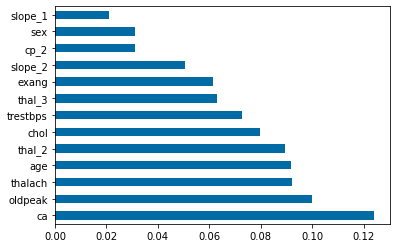


----------------------------------------------------------------------------------------------------

Importancia de los Atributos del Modelo: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1) 

[0.1  0.06 0.1  0.2  0.02 0.14 0.02 0.06 0.08 0.02 0.04 0.02 0.   0.04
 0.   0.02 0.02 0.04 0.   0.   0.02 0.  ]


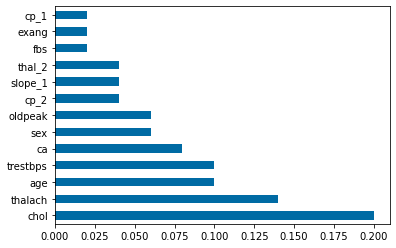


----------------------------------------------------------------------------------------------------

Importancia de los Atributos del Modelo: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

[6.98569621e-02 2.64941438e-02 3.89017550e-02 5.89264533e-02
 1.67943287e-03 8.16146278e-02 4.44665520e-02 1.15504175e-01
 1.97687703e-01 2.30703631e-02 6.60257

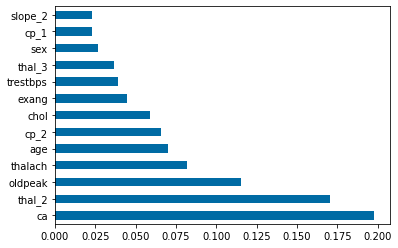


----------------------------------------------------------------------------------------------------



In [38]:
model_feat = [rf,ab,gb]

for i in model_feat:
  print("Importancia de los Atributos del Modelo:", i,"\n")
  print(i.feature_importances_)
  feat_importances = pd.Series(i.feature_importances_, index=features.columns)
  feat_importances.nlargest(13).plot(kind='barh')
  plt.show()
  print("\n"+"-"*100+"\n")

Se evidencia en la mayoría de modelos, al aplicar **feature_importances_**, se halla jerarquía en las variables **ca (número de vasos sanguíneos principales)** y **cp (dolencias en el pecho)**.

#### **Curva ROC**

Muestra el desempeño del modelo de clasificación frente a todos los umbrales de clasificación. Esta curva señala dos parámetros:  
    _1. Tasa de Verdaderos Positivos (Recall) - TPR_     
    _2. Tasa de Falsos Positivos - FPR_  
    
La Curva ROC permite visualizar TPR vs. FPR en distintos umbrales. Al disminuir el umbral de clasificación, se clasifican más elementos como positivo, y por tanto se incrementan tanto Falsos Positivos y Verdaderos Positivos.

    * Valores bajos en el eje X del gráfico indican menor cantidad de _*Falsos Positivos*_ y mayor cantidad de _*Verdaderos Negativos*_
    * Valores altos en el eje Y del gráfico indican mayor cantidad de _*Verdaderos Positivos*_ y mayor cantidad de _*Falsos Negativos*_

******************************

#### **AUC**   
Significa _*Área Bajo la Curva (Area Under the ROC Curve)*_. AUC mide el área bi-dimensional bajo la Curva ROC, entre (0,0) y (1,1).
De esta forma, se provee una medida agregada de desempeño para todos los posibles umbrales de clasificación. AUC se puede interpretar como la probabilidad de que el modelo haga un ranking más alto de ejemplos aleatorios positivos, que lo que se haría frente a ejemplos negativos aleatorios. Un modelo cuyas predicciones son 100% incorrectas, van a imprimir un AUC de 0.0, mientras que uno cuyas predicciones son 100% correctas, tendrán un AUC de 1.0.

La razón para analizar AUC se sustenta en dos puntos:  

    * AUC es de *escala invariable*, es decir, mide qué tan bien se rankean las predicciones, en vez de rankear sus valores absolutos.
    * AUC es de *umbral de clasificación invariable*, es decir, que mide la calidad de las predicciones del modelo sin tener en cuenta cuál umbral de clasificación se seleccionó.




## Resultados **auc_score** y **curvas ROC** de los algunos modelos de mayor accuracy

Precisión de la Regresión Logística: 0.8524590163934426


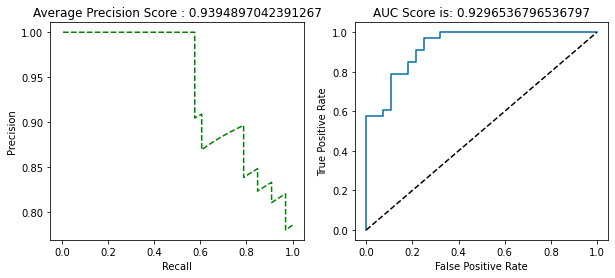

<Figure size 432x288 with 0 Axes>

In [39]:
logre_for = LogisticRegression(solver='liblinear')
logre_for.fit(X_train,y_train)
logre_for_pred=logre_for.predict(X_test)
logre_form=confusion_matrix(y_test,logre_for_pred)
logre_for_acc=accuracy_score(logre_for_pred,y_test)

print('Precisión de la Regresión Logística:',logre_for_acc)

def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,4))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
plotting(y_test,logre_for.predict_proba(X_test))
plt.figure();

Precisión del Random Forest Classifier: 0.819672131147541


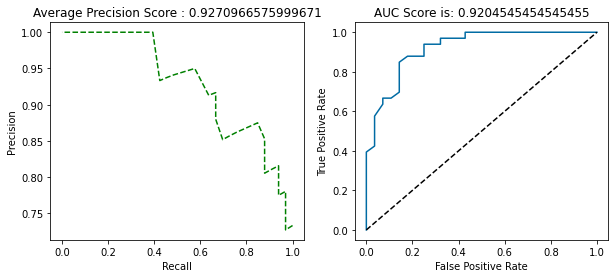

<Figure size 432x288 with 0 Axes>

In [40]:
#rand_for=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rand_for=RandomForestClassifier(random_state = 1)
rand_for.fit(X_train,y_train)
rand_for_pred=rand_for.predict(X_test)
rand_form=confusion_matrix(y_test,rand_for_pred)
rand_for_acc=accuracy_score(rand_for_pred,y_test)

print('Precisión del Random Forest Classifier:',rand_for_acc)

def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,4))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
plotting(y_test,rand_for.predict_proba(X_test))
plt.figure();

### **Cuadro resumen**

In [41]:
recap_precision = precision_modelos.to_frame()
recap_precision['Modelo'] = recap_precision.index
recap_precision['Precision'] = recap_precision[0]
recap_precision = recap_precision[['Modelo','Precision']].reset_index(drop=True)
recap_precision.sort_values(by=['Precision'], ascending=False,ignore_index=True)

,Modelo,Precision
0,Logistic Regression,0.852459
1,Random Forest Classifier,0.819672
2,Gradient Boosting Classifier,0.803279
3,KNeighbors Classifier,0.803279
4,AdaBoostClassifier,0.770492
5,Naive Bayes,0.770492
6,Decision Tree Classifier,0.754098
7,C-Support Vector Classifier,0.639344


### **Optimización de modelos**

Se seleccionan solo algunos modelos para ver el potencial que puede tener la mejora de modelos a través de la optimización de sus hiperparámetros. La optimización se puede realizar principalmente por cuatro métodos:
* Grid search
* Random Search
* Descenso por gradiente
* Optimización bayesiana

Optimización "a mano" del Random Forest:

Valor óptimo de n_estimators en función al Accuracy: 130 



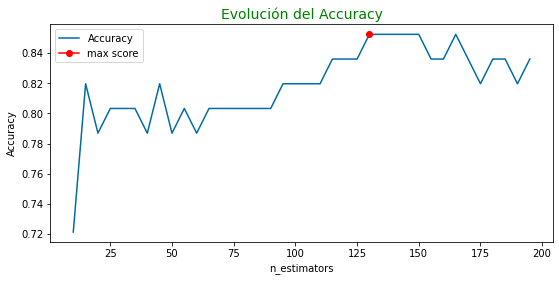

In [42]:
test_scores = []

# Rango de valores evaluados
estimator_range = range(10, 200, 5)

# Ciclo para entrenar un modelo con cada valor de n_estimators y extraer métricas de evaluación
for n_estimators in estimator_range:
    modelo = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    y_test_modelo = modelo.predict(X_test)
    test_scores.append(accuracy_score(y_test_modelo,y_test))

# Gráficos con la evolución de los errores
plt.figure(figsize = (9,4))
plt.plot(estimator_range, test_scores, label="Accuracy")
plt.plot(estimator_range[np.argmax(test_scores)], max(test_scores), marker='o', color = "red", label="max score")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.title("Evolución del Accuracy",color= 'green', fontsize= 14)
plt.legend();
print(f"Valor óptimo de n_estimators en función al Accuracy: {estimator_range[np.argmax(test_scores)]}","\n")

Precisión del Random Forest Classifier: 0.8360655737704918


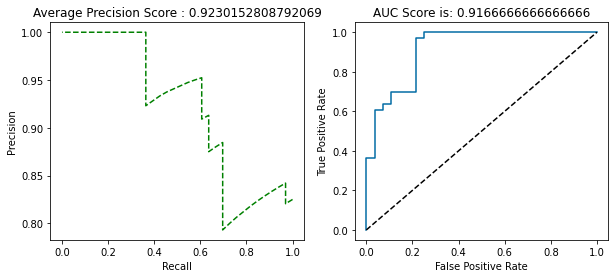

<Figure size 432x288 with 0 Axes>

In [43]:
# Se evalúa el resultado recién obtenido del mejor número de n_estimators

rand_for = RandomForestClassifier(
                n_estimators = 125,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123)

rand_for.fit(X_train,y_train)
rand_for_pred=rand_for.predict(X_test)
rand_form=confusion_matrix(y_test,rand_for_pred)
rand_for_acc=accuracy_score(rand_for_pred,y_test)
#Esta es la matriz de conf
#plt.title('Random Forest')
#sns.heatmap(rand_form,cmap='Blues',annot=True,fmt="d",cbar=False)
print('Precisión del Random Forest Classifier:',rand_for_acc)

def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,4))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
plotting(y_test,rand_for.predict_proba(X_test))
plt.figure();

Se complementan las optimizaciones con el uso de métodos Grid Search y Random Search

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [45]:
# se plantea el modelo
logre_grid = LogisticRegression(solver='liblinear')

In [46]:
# Se parametriza el grid con los hiperparámetros que se van a revisar y sus posibles valores
param_grid = {'penalty':['none', 'l1', 'l2', 'elasticnet'],
              'C': np.arange(2,50,2),
             'solver':['newton-cg', 'lbfgs', 'liblinear']}

In [47]:
# Se aplica el modelo con los datos del grid
model_logre = GridSearchCV(logre_grid, param_grid=param_grid, cv=5)

# Se entrena con el grid definitivo y CV con tamaño de Fold=5
model_logre.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [48]:
# Se busca la combinación de parámetros que entrega el mejor score posible
print("Mejores parametros: "+str(model_logre.best_params_))
print("Mejor Score: "+str(model_logre.best_score_)+'\n')
scores = pd.DataFrame(model_logre.cv_results_) # En caso que se quiera ver cada uno de los scores

Mejores parametros: {'C': 2, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor Score: 0.8222789115646257



In [49]:
# Luego de identificar los mejores parámetros, se ajusta el modelo y se hace la predicción
logre_grid_ajuste = LogisticRegression(solver='newton-cg', penalty='l2' , C=2) # Instanciar el modelo
logre_grid_ajuste.fit(X_train,y_train) # Entrenamiento
predilog = logre_grid_ajuste.predict(X_test) # Predicción
print('Exactitud:', accuracy_score(y_test, predilog)) # Evaluación

Exactitud: 0.8524590163934426


### **Ahora con Random Search**

In [50]:
import scipy as sp

param_dist = {'penalty':['none', 'l1', 'l2', 'elasticnet'],
              'C': np.arange(2,50,1),
             'solver':['newton-cg', 'lbfgs', 'liblinear']}

In [51]:
logre_rdm = LogisticRegression(solver='liblinear') # se plantea el modelo

In [52]:
# Se aplica el modelo con los datos con los que se harán las iteraciones
model_logre_rdm = RandomizedSearchCV(logre_rdm, param_dist,n_iter=300, random_state=0, cv=5)

# Entrenamiento del modelo
model_logre_rdm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=300, n_jobs=None,
                   param_distributions={'C': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                

In [53]:
# Se busca la combinación de parámetros que entrega el mejor score posible
print("Mejores parametros: "+str(model_logre_rdm.best_params_))
print("Mejor Score: "+str(model_logre_rdm.best_score_)+'\n')

scores_rdm = pd.DataFrame(model_logre_rdm.cv_results_) # En caso que se quiera ver cada uno de los scores

Mejores parametros: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 2}
Mejor Score: 0.8222789115646257



In [54]:
logre_rdm_ajuste = LogisticRegression(solver='liblinear',penalty='l2',C=2) # Instanciar el modelo
logre_rdm_ajuste.fit(X_train, y_train) # Entrenamiento
prediction_rdm = logre_rdm_ajuste.predict(X_test) # Predicción
print('Exactitud:', accuracy_score(y_test, prediction_rdm)) # Evaluación
# Reporte de Clasificacion
report = classification_report(y_test, prediction_rdm)
print("Reporte de Clasificación:")
print(report)

Exactitud: 0.8524590163934426
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## **PCA (Principal Component Analysis)**

"El Análisis de Componentes Principales (PCA) se usa para explicar la estructura varianza-covarianza de un conjunto de variables a través de combinaciones lineales. También es usada como una técnica de reducción dimensional".  
El Primer Componente Principal tiene la mayor varianza posible; y para cada componente principal subsiguiente, la varianza disminuye.  

El PCA se calcula siguiendo estos pasos:  

      1. Estandarizar el rango de las variables continuas iniciales.  
      2. Calcule la matriz de covarianza para identificar las correlaciones.  
      3. Calcule los vectores propios y los valores propios de la matriz de covarianza para identificar los componentes principales.  
      4. Crear un vector de características para decidir qué componentes principales mantener.

[8.53432314e+01 1.66466916e+00 1.14353542e+00 9.45401807e-01
 8.03004712e-01 5.64352554e-01 4.48941732e-01 4.08834983e-01
 3.09492233e-01 2.17738302e-01 1.54533001e-01 1.50789149e-01
 1.21434115e-01 9.04785934e-02 7.05328756e-02 5.40162515e-02
 4.19153940e-02 2.23273829e-02 1.04123161e-02 9.10322168e-33
 6.59037284e-33 5.77379234e-33]
[9.21975261e-01 1.79836614e-02 1.23537784e-02 1.02133123e-02
 8.67497594e-03 6.09678219e-03 4.84998240e-03 4.41670339e-03
 3.34348932e-03 2.35225834e-03 1.66944234e-03 1.62899696e-03
 1.31187029e-03 9.77453319e-04 7.61976847e-04 5.83545371e-04
 4.52818058e-04 2.41205944e-04 1.12485755e-04 9.83434193e-35
 7.11967501e-35 6.23751130e-35]

['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_1', 'cp_2', 'cp_3', 'slope_0', 'slope_1', 'slope_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'restecg_0', 'restecg_1', 'restecg_2']


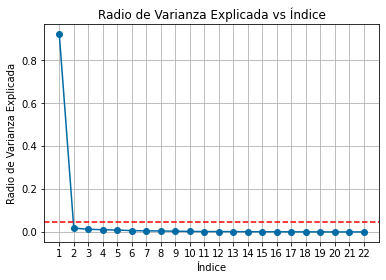

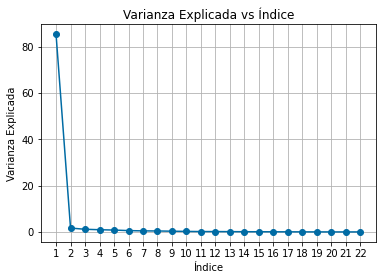

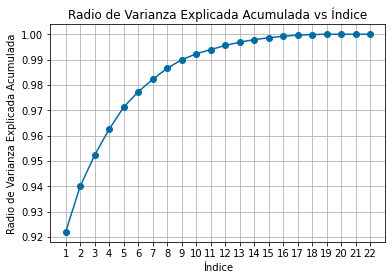

In [61]:
from sklearn.decomposition import PCA

nVar = X_train.shape[1]
pca = PCA().fit(X_train)
print(pca.explained_variance_) #Se refiere a la varianza explicada por cada uno de los componentes elegidos, o valores propios

print(pca.explained_variance_ratio_) #adio de Varianza Explicada es la Varianza Explicada dividida por la suma de los valores propios
print()
print(X_train.columns.values.tolist())

cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1,nVar+1), pca.explained_variance_ratio_, marker = 'o')
plt.title('Radio de Varianza Explicada vs Índice')
plt.xlabel('Índice')
plt.ylabel('Radio de Varianza Explicada')
plt.xticks(np.arange(1,nVar+1))
plt.axhline((1/nVar), color = 'r', linestyle = '--')
plt.grid(True)
plt.show()

plt.plot(np.arange(1,nVar+1),pca.explained_variance_,marker = 'o')
plt.title('Varianza Explicada vs Índice')
plt.xlabel('Índice')
plt.ylabel('Varianza Explicada')
plt.xticks(np.arange(1,nVar+1))
plt.grid(True)
plt.show()

plt.plot(np.arange(1,nVar+1),cumulative_var_ratio, marker = 'o')
plt.title('Radio de Varianza Explicada Acumulada vs Índice')
plt.xlabel('Índice')
plt.ylabel('Radio de Varianza Explicada Acumulada')
plt.xticks(np.arange(1,nVar+1))
plt.grid(True)
plt.show()

In [60]:
pca = PCA(n_components=2)  # el codo en la gráfica muestra dimension de 2, por tanto, seleccionamos los valores propios
# del Radio de la Varianza Explicada que es mayor al número de variables recíprocas
X_reduced_train = pd.DataFrame(pca.fit_transform(X_train))
X_reduced_test = pd.DataFrame(pca.fit_transform(X_test))

### **Explicación**   
El análisis de componentes principales, o PCA, es un método que suele utilizarse para reducir la dimensionalidad de grandes conjuntos de datos, transformando un gran conjunto de variables en otro más pequeño que siga conteniendo la mayor parte de la información del conjunto grande.

**Explained Variance Ratio:** Se refiere a la varianza explicada por cada uno de los PCA (vectores propios). Puede representarse como una función de la relación entre el valor propio relacionado y la suma de los valores propios de todos los vectores propios.

Dentro del código, la _Varianza Explicada_ puede ser calculada como el atributo explained_variance_ratio_ de la instancia PCA.

De acuerdo al comportamiento anterior del bloque PCA, se seleccionan **2 componentes** que se tomarán para nuestro análisis posterior, ya que el codo en el gráfico es en número de dimensiones para ser 2.

Con el objetivo de mejorar el performance de los clasificadores, se realizará encoding a algunas de las features.

# **Resumen de  los mejores modelos**

Random Forest Classifier    0.819672
KNeighbors Classifier       0.803279
Logistic Regression         0.852459
dtype: float64

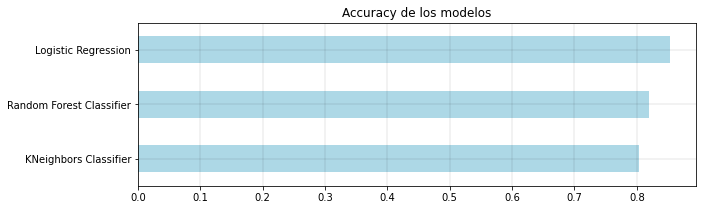

In [73]:
precision_modelos = pd.Series(data=[results['RandomForestClassifier']['accuracy'],
                                    results['KNeighborsClassifier']['accuracy'],
                                    results['LogisticRegression']['accuracy']], 
        index=['Random Forest Classifier','KNeighbors Classifier','Logistic Regression'])

fig_mod= plt.figure(figsize=(10,3))
precision_modelos.sort_values().plot.barh(color='lightblue')
plt.title('Accuracy de los modelos')
plt.grid(color='black', linestyle='-', linewidth=0.1)
fig_mod.set_facecolor('white')
precision_modelos

# **4. Conclusiones**

- El análisis de enfermedades del corazón (el modelado) es confiable y clínicamente útil, cuando se ejecuta sobre pacientes que ya presenten síntomas, tales como dolores de pecho así como prevalencia de otro tipo de enfermedades relacionadas.

- De forma preliminar, se usaron diversos modelos ya que el dataset usado en el presente trabajo no es tan robusto y no requiere de gran procesamiento. 

- Después de usar distintos clasificadores, los modelos de mejor desempeño, según la métrica **_accuracy_** son:  
  Logistic Regression - 0.852459   
  Random Forest - 0.819672   
  KNeighbors Classifier - 0.803279

- Para brindar mayor soporte teórico a los modelos y a los datos, es importante considerar la posibilidad de ampliar significativamente el conjunto de datos. En este sentido, es importante no extrapolar datos cuya demografía no sea equivalente a un grupo distinto. 


### **Anexo: Explicación detallada de algunos modelos de clasificación**

#### _**Regresión Logística**_

El Modelo de Regresión Logística se utiliza en situaciones en las que la
variable dependiente de interés y no es de naturaleza continua, sino que
simplemente indica si se ha producido o no un determinado suceso (por
ejemplo, si un infarto ha originado o no el fallecimiento del infartado)

La variable respuesta asociada a unos determinados valores xij de las
variables explicativas sólo tiene por tanto dos “valores” posibles, que se pueden codificar como:

- Y = 1 si se he producido el suceso estudiado (en el ejemplo: si la persona infartada fallece en un determinado plazo)

- Y = 0 si no se produce el suceso (en el ejemplo: si la persona infartada no fallece en el plazo considerado)

La distribución de este tipo de variable aleatoria (Distribución de Bernouilli) viene caracterizada por un único parámetro p, que es la probabilidad de que se produzca el suceso en cuestión.

Se demuestra fácilmente que la media E(Y) de Y es precisamente p. Por lo tanto, en estas situaciones el modelo general de regresión es: 

E(Y/X1=x1j,...,XI=xIj) = p/(X1=x1j,...,XI=xIj) = f(x1j...xIj)

La Regresión Logística es uno de los algoritmos de Machine Learning más simples y más utilizados para la clasificación de dos clases. Es fácil de implementar y se puede usar como línea de base para cualquier problema de clasificación binaria. La Regresión Logística describe y estima la relación entre una variable binaria dependiente y las variables independientes.

#### _**Random Forest**_

En Aprendizaje de Máquina, el Random Forest es capaz de ejecutar tareas tanto de regresión como de clasificación. Ataca problemas de reducción de dimensionalidad, valores faltantes, valores atípicos. A continuación se presentan los resultados del modelado con Random Forest.

#### _**Decision Tree - Árboles de Decisión**_

Los Árboles de Decisión son un Algoritmo de Aprendizaje Supevisado (al tener en cuenta una variable objetivo predeterminada, 'target') y se usa ampliamente en problemas de clasificación. En un principio, la técnica consiste en dividir la población o muestra en dos o más sub-poblaciones o conjuntos homogéneos, mediante el diferenciador más significativo en las variables de entrada.

6  Bibliografía
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.

2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."

3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

4. Schmidhuber, J. (2015). Deep learning in neural networks: An overview. Neural networks, 61, 85-117.

5. Nielsen, M. A. (2015). Neural networks and deep learning (Vol. 2018). San Francisco, CA, USA:: Determination press.

6. Das, R., Turkoglu, I., & Sengur, A. (2009). Effective diagnosis of heart disease through neural networks ensembles. Expert systems with applications, 36(4), 7675-7680.

7. Ekız, S., & Erdoğmuş, P. (2017, April). Comparative study of heart disease classification. In 2017 Electric Electronics, Computer Science, Biomedical Engineerings' Meeting (EBBT) (pp. 1-4). IEEE.

8. Vadicherla, D., & Sonawane, S. (2013). Classification of heart disease using Svm and ANN. Int. J. Res. Comput. Commun. Technol, 2(9), 693-701.

9. Ajam, N. (2015). Heart Diseases Diagnoses using Artificial Neural Network. IISTE Network and Complex Systems, 5(4).